# Fight Analysis

In [84]:
#import libraries going to be used

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Extract data from CSV files

In [65]:
df_event_interview = pd.read_csv("event_interview.csv")
df_event_interview.head() 

,id,name,date,promoter,location,attendance,created_at,modified_at
0,1,One FC 10: Champions and Warriors,2013-09-13,OneFC,NaN,NaN,2019-04-01T19:56:24.477518,2019-04-01T19:56:24.477518
1,2,Legacy FC 45: Todhunter vs. Smith,2015-09-11,Legacy Fc,NaN,NaN,2019-04-01T19:56:28.403410,2019-04-01T19:56:28.403410
2,3,LFA 27: Watley vs. Wilson,2017-11-10,LFA,NaN,NaN,2019-04-01T19:56:32.488043,2019-04-01T19:56:32.488043
3,4,ONE FC 21: Roar of Tigers,2014-10-17,OneFC,NaN,NaN,2019-04-01T19:56:39.395144,2019-04-01T19:56:39.395144
4,5,One FC 8: Kings and Champions,2013-04-05,OneFC,NaN,NaN,2019-04-01T19:56:39.404131,2019-04-01T19:56:39.404131


In [66]:
df_fighter=pd.read_csv("fighter_interview.csv")
df_fighter.head()

,id,name,nationality
0,111,Bertrand Amoussou,France
1,3227,Dave Zitanick,United States
2,2002,Jim Mullen,United States
3,2033,Mario Neto,Brazil
4,1667,Aaron Lanfranco,United States


In [67]:
df_fight_outcome= pd.read_csv("outcome_interview.csv")
df_fight_outcome.head()

,id,fighter1_id,fighter2_id,winner_id,event_id
0,2264,803,138,138.0,18
1,2272,3025,466,466.0,494
2,2280,3005,1671,1671.0,375
3,2292,2110,284,284.0,352
4,2310,1346,607,1346.0,826


It is important to know the number of fight being played so that we don't miss any record. We can do that using shape keyword :

In [70]:
df_fight_outcome.shape[0]

8371

## De-Normalize Data

In this section we would de normalize the data since the fight detail contains only IDs but we need to have the name. The easy to understand approach is to join dataframe one by one and rename features avoiding any confusion. 

In [72]:
#Extract Fighter1 details

df_fighter1_tmp = pd.merge(df_fight_outcome, df_fighter,  how='left', left_on=['fighter1_id'], right_on = ['id'])
df_fighter1_tmp = df_fighter1_tmp.rename({'name':'fighter1_name','nationality':'fighter1_nationality'},axis=1)
df_fighter1_tmp.head()

,id_x,fighter1_id,fighter2_id,winner_id,event_id,id_y,fighter1_name,fighter1_nationality
0,2264,803,138,138.0,18,803,Mike Easton,United States
1,2272,3025,466,466.0,494,3025,Bobby Voelker,United States
2,2280,3005,1671,1671.0,375,3005,Jamie Varner,United States
3,2292,2110,284,284.0,352,2110,Andy Ogle,England
4,2310,1346,607,1346.0,826,1346,Anthony Johnson,United States


In [73]:
# Extract Fighter 2 details

df_fighter2_tmp = pd.merge(df_fighter1_tmp, df_fighter,  how='left', left_on=['fighter2_id'], right_on = ['id'])
df_fighter2_tmp =  df_fighter2_tmp.rename( { 'name':'fighter2_name', 'nationality':'fighter2_nationality'}, axis=1)
df_fighter2_tmp.head()

,id_x,fighter1_id,fighter2_id,winner_id,event_id,id_y,fighter1_name,fighter1_nationality,id,fighter2_name,fighter2_nationality
0,2264,803,138,138.0,18,803,Mike Easton,United States,138,Raphael Assuncao,Brazil
1,2272,3025,466,466.0,494,3025,Bobby Voelker,United States,466,Patrick Cote,Canada
2,2280,3005,1671,1671.0,375,3005,Jamie Varner,United States,1671,Joe Lauzon,United States
3,2292,2110,284,284.0,352,2110,Andy Ogle,England,284,Maximo Blanco,Venezuela
4,2310,1346,607,1346.0,826,1346,Anthony Johnson,United States,607,Phil Davis,United States


In [74]:
#Extract Winner details

df_winner_tmp = pd.merge(df_fighter2_tmp, df_fighter,  how='left', left_on=['winner_id'], right_on = ['id'])
df_winner_tmp = df_winner_tmp.rename({'name':'winner_name','nationality':'winner_nationality'},axis=1)
df_winner_tmp.head()

,id_x,fighter1_id,fighter2_id,winner_id,event_id,id_y,fighter1_name,fighter1_nationality,id_x,fighter2_name,fighter2_nationality,id_y,winner_name,winner_nationality
0,2264,803,138,138.0,18,803,Mike Easton,United States,138,Raphael Assuncao,Brazil,138.0,Raphael Assuncao,Brazil
1,2272,3025,466,466.0,494,3025,Bobby Voelker,United States,466,Patrick Cote,Canada,466.0,Patrick Cote,Canada
2,2280,3005,1671,1671.0,375,3005,Jamie Varner,United States,1671,Joe Lauzon,United States,1671.0,Joe Lauzon,United States
3,2292,2110,284,284.0,352,2110,Andy Ogle,England,284,Maximo Blanco,Venezuela,284.0,Maximo Blanco,Venezuela
4,2310,1346,607,1346.0,826,1346,Anthony Johnson,United States,607,Phil Davis,United States,1346.0,Anthony Johnson,United States


In [75]:
#Join Event details of fight 

df_event_tmp = pd.merge(df_winner_tmp, df_event_interview,  how='left', left_on=['event_id'], right_on = ['id'])
df_event_tmp=df_event_tmp.rename({'name':'event_name'},axis=1)
df_event_tmp.head()

,id_x,fighter1_id,fighter2_id,winner_id,event_id,id_y,fighter1_name,fighter1_nationality,id_x,fighter2_name,...,winner_name,winner_nationality,id,event_name,date,promoter,location,attendance,created_at,modified_at
0,2264,803,138,138.0,18,803,Mike Easton,United States,138,Raphael Assuncao,...,Raphael Assuncao,Brazil,18,UFC on FOX 5: Henderson vs. Diaz,2012-12-08,UFC,"Seattle, Washington, USA",14412.0,2019-04-01T19:58:48.187984,2019-04-02T16:03:00.223630
1,2272,3025,466,466.0,494,3025,Bobby Voelker,United States,466,Patrick Cote,...,Patrick Cote,Canada,494,UFC 158: St-Pierre vs. Diaz,2013-03-16,UFC,"Montreal, Quebec, Canada",20145.0,2019-04-01T20:22:58.149827,2019-04-02T16:03:12.074281
2,2280,3005,1671,1671.0,375,3005,Jamie Varner,United States,1671,Joe Lauzon,...,Joe Lauzon,United States,375,UFC on FOX 4: Shogun vs. Vera,2012-08-04,UFC,"Los Angeles, California, USA",16080.0,2019-04-01T20:19:07.361668,2019-04-02T16:03:22.702576
3,2292,2110,284,284.0,352,2110,Andy Ogle,England,284,Maximo Blanco,...,Maximo Blanco,Venezuela,352,UFC Fight Night 41: Munoz vs. Mousasi,2014-05-31,UFC,"Berlin, Germany",8000.0,2019-04-01T20:16:57.106253,2019-04-02T16:03:28.277431
4,2310,1346,607,1346.0,826,1346,Anthony Johnson,United States,607,Phil Davis,...,Anthony Johnson,United States,826,UFC 172: Jones vs. Teixeira,2014-04-26,UFC,"Baltimore, Maryland, USA",13485.0,2019-04-01T20:37:02.295899,2019-04-02T16:03:29.271539


Verify again the number of rows are exactly the same as the fight rows. 

In [76]:
df_event_tmp.shape[0]

8371

Which is correct value. Let us get the required data frame:


In [82]:
df_result = df_event_tmp[['fighter1_name' ,'fighter2_name', 'fighter1_nationality', 'fighter2_nationality','event_name']]
df_result.head()

,fighter1_name,fighter2_name,fighter1_nationality,fighter2_nationality,event_name
0,Mike Easton,Raphael Assuncao,United States,Brazil,UFC on FOX 5: Henderson vs. Diaz
1,Bobby Voelker,Patrick Cote,United States,Canada,UFC 158: St-Pierre vs. Diaz
2,Jamie Varner,Joe Lauzon,United States,United States,UFC on FOX 4: Shogun vs. Vera
3,Andy Ogle,Maximo Blanco,England,Venezuela,UFC Fight Night 41: Munoz vs. Mousasi
4,Anthony Johnson,Phil Davis,United States,United States,UFC 172: Jones vs. Teixeira


## Visualize

Let us see the distribution of fighters from various nationalities as per the given data. 

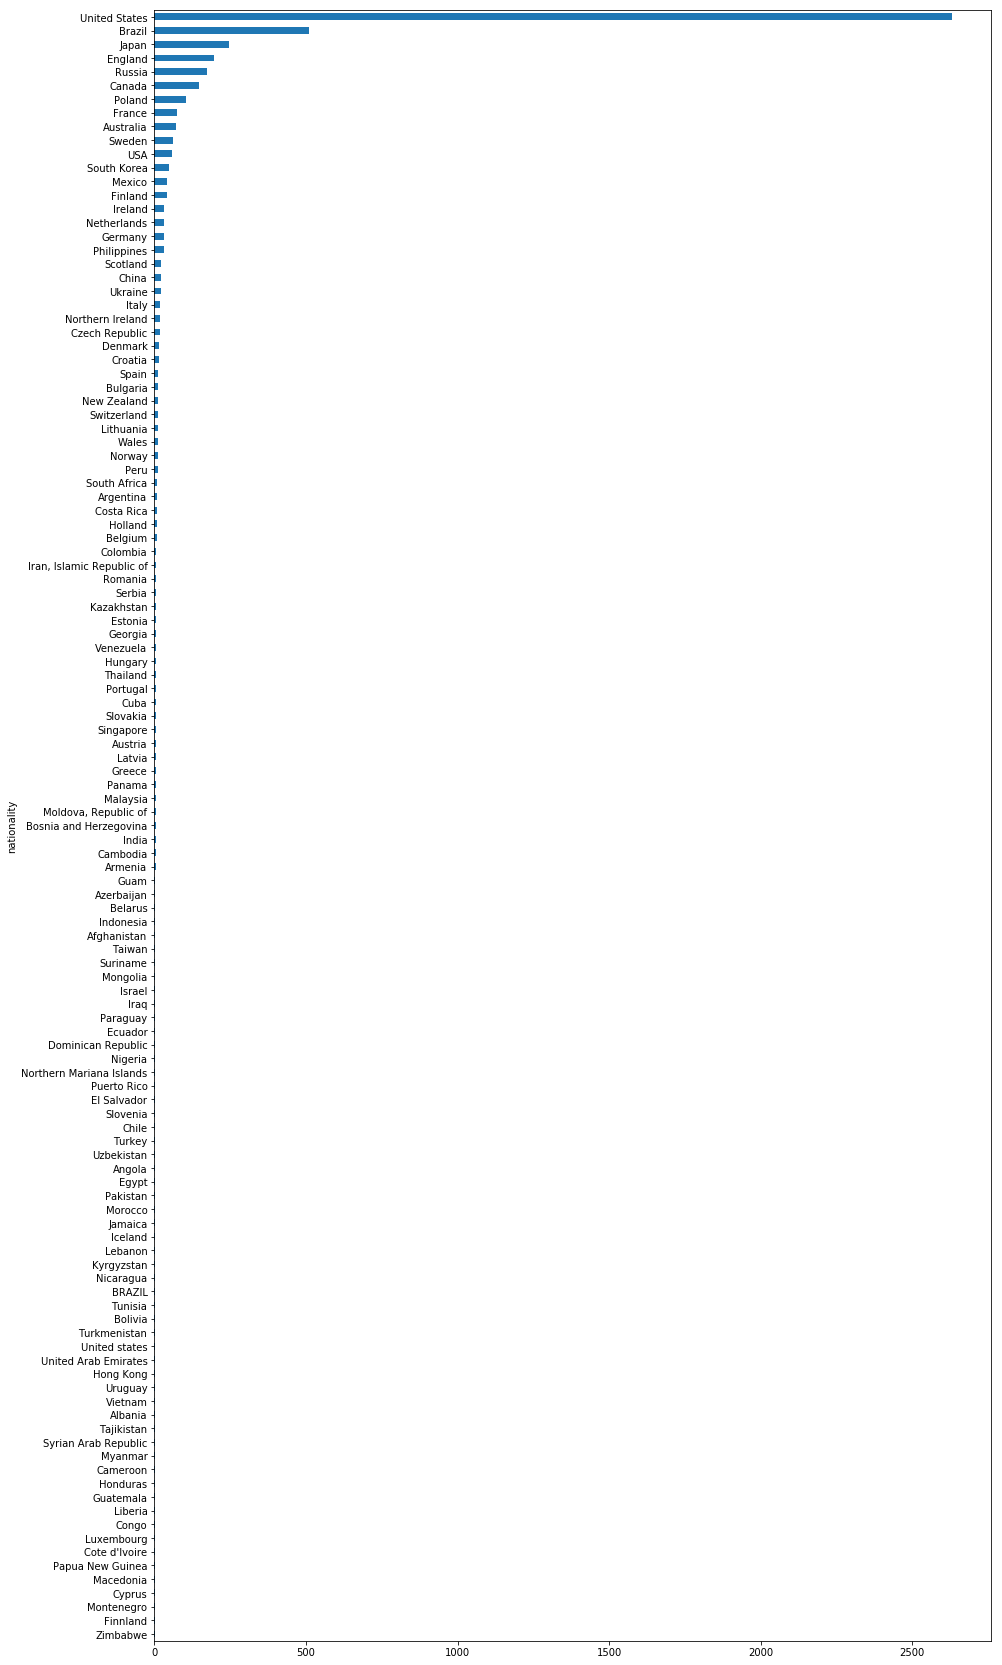

In [112]:
df_fighter.groupby('nationality').count().sort_values('id',ascending=True)['name'].plot(kind='barh',figsize=(15,30))